# Group 55 Project Proposal: Type 2 Diabetes Based on Glucose and BMI 

### Introduction

**Relevant Background:** Type 2 diabetes is the result of one’s inability to properly use insulin when high levels of sugar are introduced to the body. Insulin is used to absorb glucose out of the blood system; however, if the body does not make any insulin, which is the case for patients with type 2 diabetes, the glucose levels may not be managed to a safe level. While type 2 diabetes is preventable, there are many factors that can induce the development of type 2 diabetes such as food intake, genetics, or weight.  

**Dataset Information:** The dataset we will be using includes the data for type 2 diabetic cases for female Pima Indian Heritage patients of at least 20 years of age. The dataset includes the number of pregnancies, glucose levels in the blood, blood pressure, the thickness of the skin, insulin levels in the blood, body mass index (BMI), diabetes pedigree function which is the likelihood of getting type 2 diabetes, age and outcome which is either 1 (has diabetes) or 0 (doesn’t have diabetes.) 

**Predictive Question:** What glucose and BMI values indicate type 2 diabetes? 

### Preliminary Exploratory Data Analysis

In [1]:
# importing libraries 
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
# importing data

diabetes <- read_csv("https://raw.githubusercontent.com/kzhang1223/dsci-100-2023s1-group-55/main/diabetes.csv") |>
        mutate(Outcome = as_factor(Outcome))

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# table of data 
diabetes_split <- initial_split( diabetes, prop = 0.75, strata = Outcome)
diabetes_train <- training(diabetes_split) 
diabetes_test <- testing(diabetes_split)

diabetes_no_zeroes <- diabetes_train |> 
                filter(BloodPressure != 0, BMI != 0)

diabetes_no_zeroes

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,89,66,23,94,28.1,0.167,21,0
5,116,74,0,0,25.6,0.201,30,0
10,139,80,0,0,27.1,1.441,57,0
1,103,30,38,83,43.3,0.183,33,0
3,126,88,41,235,39.3,0.704,27,0
8,99,84,0,0,35.4,0.388,50,0
1,97,66,15,140,23.2,0.487,22,0
13,145,82,19,110,22.2,0.245,57,0
5,117,92,0,0,34.1,0.337,38,0


In [4]:

#Missing row count
diabetes_missing_rows <- diabetes_train |> 
            filter(BloodPressure == 0 | BMI == 0) |>
            summarize(count = n())

diabetes_missing_rows


#Number of Observations
diabetes_obs <- nrow(diabetes_no_zeroes)
diabetes_no_zeroes |>
  group_by(Outcome) |>
  summarize(
    count = n(),
    percentage = n() / diabetes_obs * 100
  )

#Mean of Predictors
avg_predict <- diabetes_no_zeroes |>
            select(BMI, BloodPressure) |>
            summarize(average_BMI = mean(BMI),
                      average_BP = mean(BloodPressure))

avg_predict


count
<int>
29


Outcome,count,percentage
<fct>,<int>,<dbl>
0,359,65.63071
1,188,34.36929


average_BMI,average_BP
<dbl>,<dbl>
32.18611,72.12431


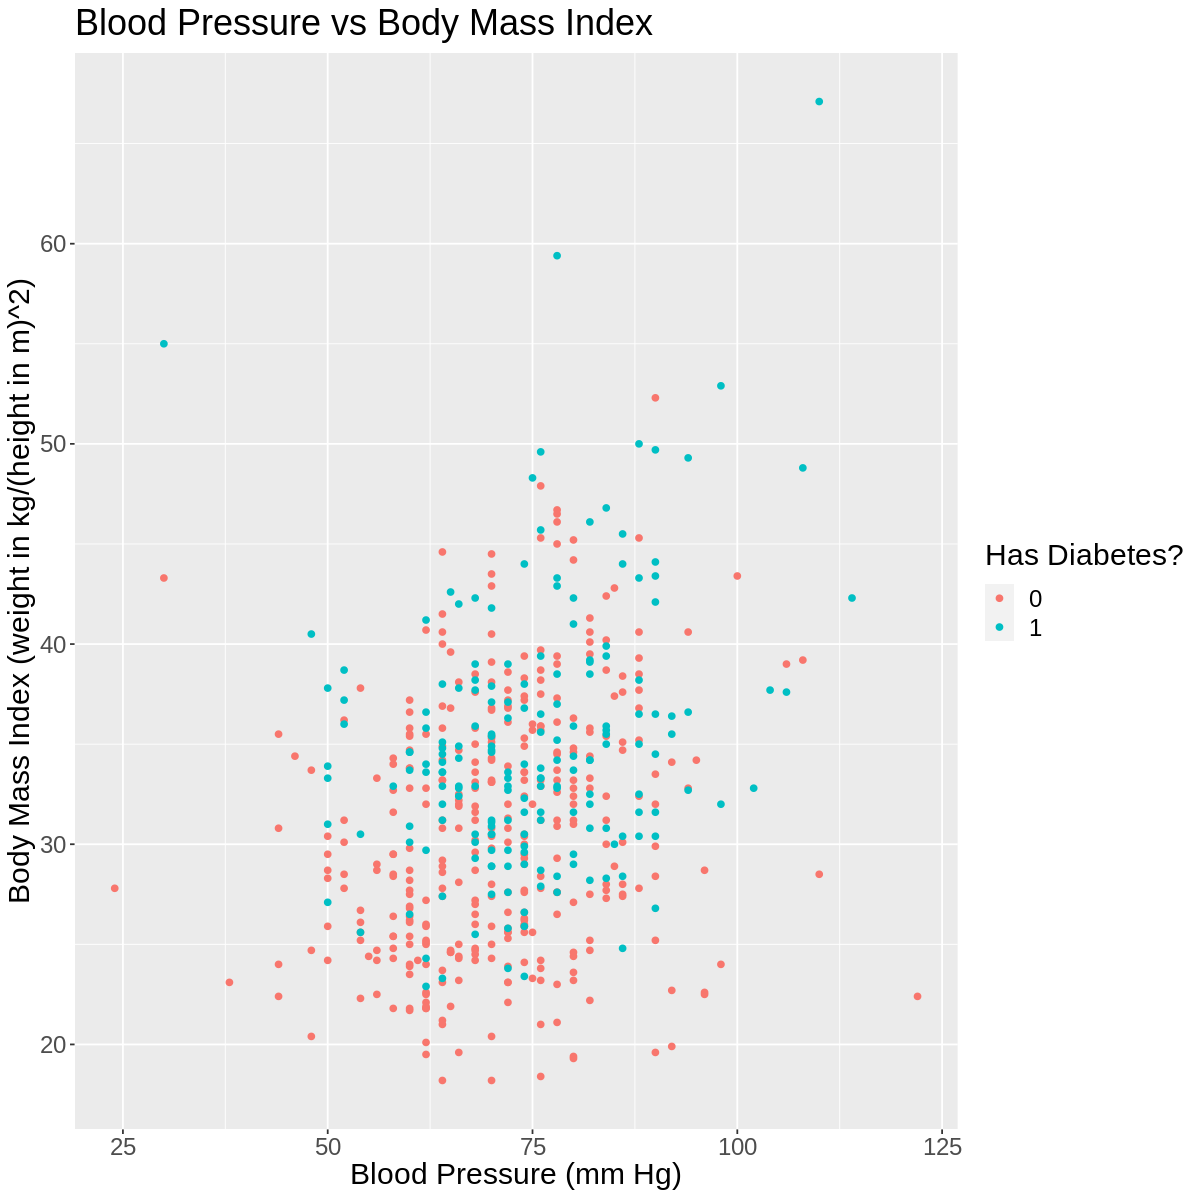

In [5]:
# visualization
options(repr.plot.width = 10, repr.plot.height = 10)

diabetes_plot <- diabetes_no_zeroes |>
            ggplot(aes(x = BloodPressure, y = BMI)) + 
            geom_point(aes(color = Outcome)) +
            labs(x = "Blood Pressure (mm Hg)", y = "Body Mass Index (weight in kg/(height in m)^2)", color = "Has Diabetes?") +
            theme(text = element_text(size = 18)) + 
            ggtitle("Blood Pressure vs Body Mass Index") + 
            scale_fill_brewer(palette = 'Set2')

diabetes_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



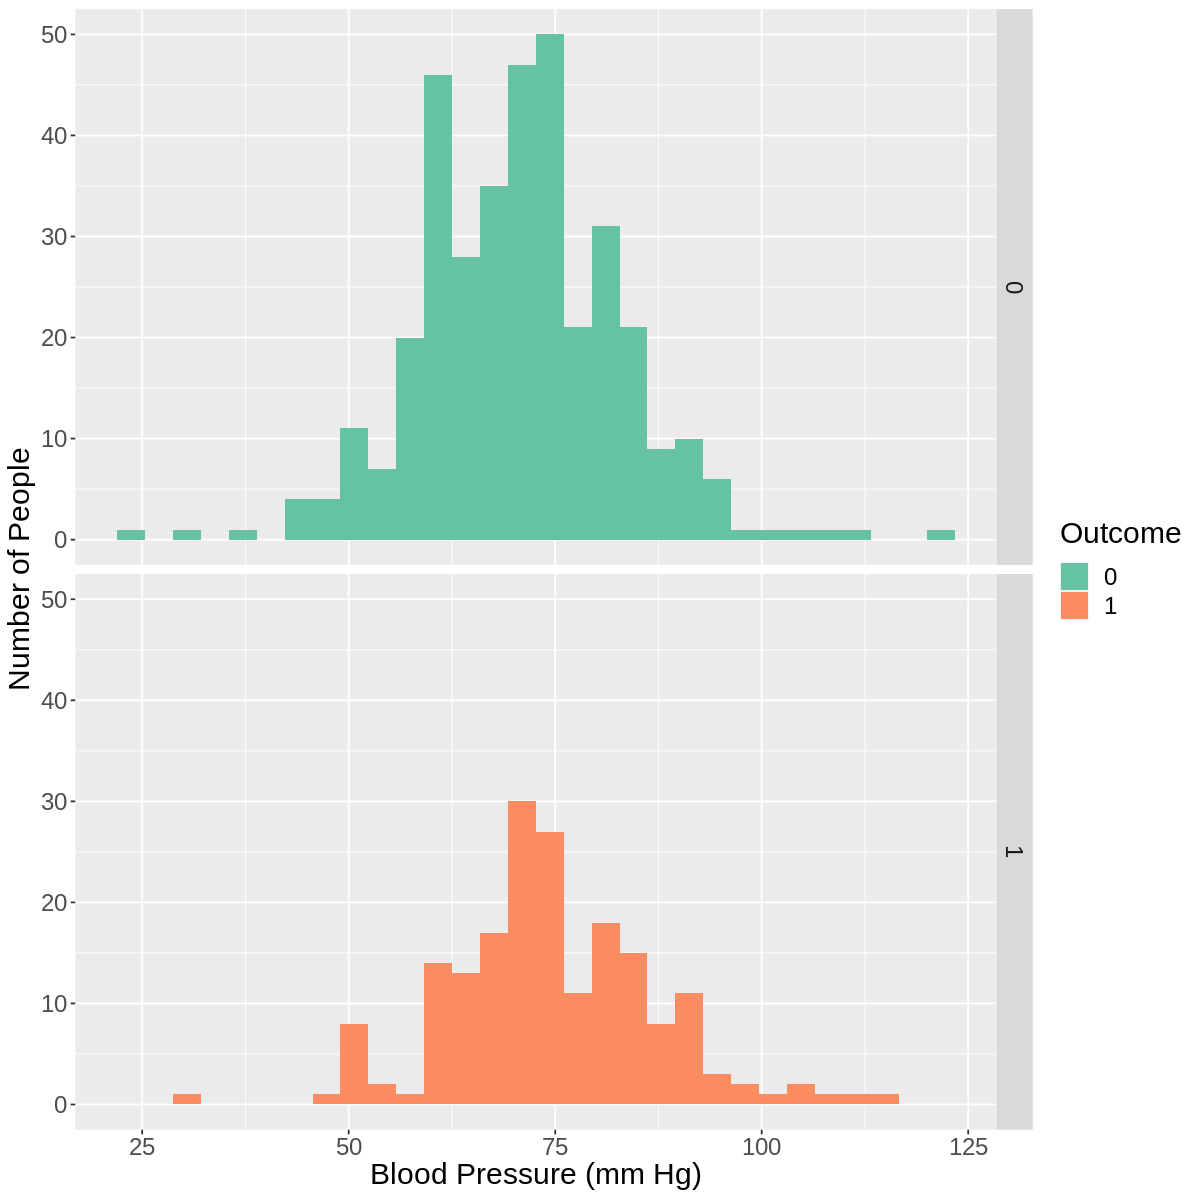

In [11]:
diabetes_bp <- diabetes_no_zeroes |>
            ggplot(aes(x = BloodPressure)) +
            geom_histogram(aes(fill = Outcome)) + 
            labs(x = "Blood Pressure (mm Hg)", y = "Number of People") +
            theme(text = element_text(size = 18)) + 
            facet_grid(rows = vars(Outcome))+
             scale_fill_brewer(palette = 'Set2')
diabetes_bp

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



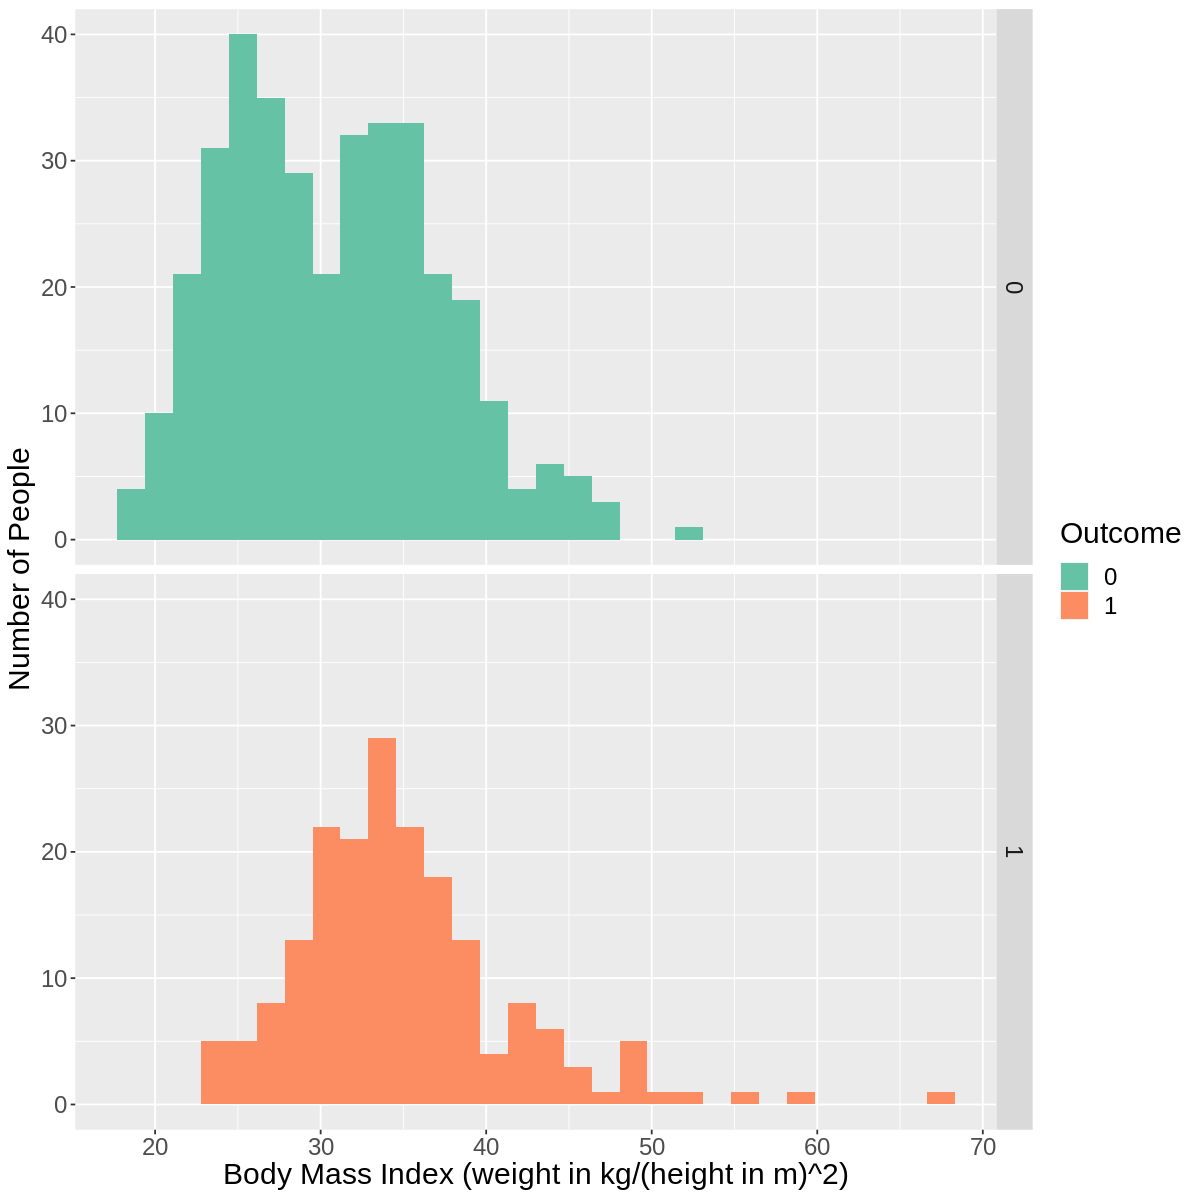

In [12]:
diabetes_BMI<- diabetes_no_zeroes |>
    ggplot(aes(x = BMI, fill = Outcome))+
    geom_histogram()+
    facet_grid(rows = vars(Outcome))+
    labs(x = "Body Mass Index (weight in kg/(height in m)^2)",
         y = "Number of People")+
    theme(text = element_text(size = 18))+
    scale_fill_brewer(palette = 'Set2')

diabetes_BMI

### Methods

We will use the k-nearest neighbors classifier to create a model that will predict whether one has or does not have diabetes based on glucose levels in the blood and BMI. Through this model, we will use a 5-fold cross-validation to determine the best k value for the highest accuracy. This classifier would require high accuracy as diabetes should be treated before it becomes increasingly harmful. Inaccurate classifications of patients can lead to late treatment and/or unnecessary treatment for those who don’t actually have diabetes. 

One way we will visualize results is by using a scatter plot of glucose (x-axis) vs. BMI (y-axis) where each point’s color will be linked to the outcome of whether one has type 2 diabetes or not. Using this visualization, we will be able to see the relationship between glucose and BMI and how that affects the diagnosis of diabetes. 

### Expected Outcomes and Significance

We expect to find that there is a positive correlation between glucose and BMI resulting in type 2 diabetes. Since extra glucose can be stored in the body as fat and hence BMI, this could potentially lead to higher risks of type 2 diabetes. These findings could point to the prevention of type 2 diabetes which could help aid doctors in diagnosing patients accurately. These findings could potentially lead to questions regarding the susceptibility of type 2 diabetes based on a patient's blood pressure. In addition to this, perhaps cases of type 2 diabetes in male Pima Indian heritage as well as other ethnicities could be examined. 